#  Statstics Project 2 - MNIST Data Set 

# PART - 1

### Importing required libraries

In [1]:
import struct
import gzip
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Extracting training and testing images 

In [2]:
def get_images(filename):
      ''' Function for extracting the training and testing images 
      '''
      with gzip.GzipFile(Path('D:\Statistics\Project2', filename), 'rb') as f:
          magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
          #print(magic, size, rows, cols)
          images = np.frombuffer(f.read(), dtype=np.dtype('B'))
      return images.reshape(size, rows,cols)


In [3]:
train = {} #dictionary for storing the training image array 
test= {} #dictionary for storing the testing image array 
train['image'] = get_images('train-images-idx3-ubyte.gz')
test['image'] = get_images('t10k-images-idx3-ubyte.gz')
print("Shape of training data" ,train['image'].shape)
print("Shape of testing data" ,test['image'].shape)



Shape of training data (60000, 28, 28)
Shape of testing data (10000, 28, 28)


##### Flattening the 28X28 images pixels values into 1D array of 784

In [4]:
num_pixels = train['image'].shape[1] * train['image'].shape[2]
image_train = train['image'].reshape(train['image'].shape[0], num_pixels).astype('float32')
image_test = test['image'].reshape(test['image'].shape[0], num_pixels).astype('float32')
print("Shape of training data after flatten into 1D array" ,image_train.shape)
print("Shape of testing data after flatten into 1D array" ,image_test.shape)

Shape of training data after flatten into 1D array (60000, 784)
Shape of testing data after flatten into 1D array (10000, 784)


### Extracting labels of  training and testing images

In [5]:
#Get labels of digit

def get_labels (filename):
    with gzip.GzipFile(Path('D:\Statistics\Project2', filename), 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return labels

y_train = get_labels("train-labels-idx1-ubyte.gz")
y_test = get_labels("t10k-labels-idx1-ubyte.gz")
print("Shape of y_train " ,y_train.shape)
print("Shape of y_test " ,y_test.shape)

Shape of y_train  (60000,)
Shape of y_test  (10000,)


##### Check that it's loaded in properly

Digit in the image is  8


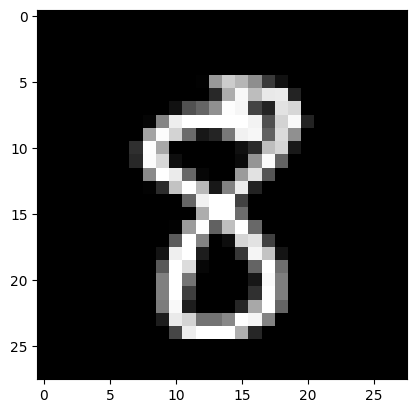

In [6]:
#Plotting image with pixel values
index = 46
fig, ax = plt.subplots()
_= ax.imshow(train['image'][index], cmap='gray')

print("Digit in the image is ",y_train[index])

#####  Snippet to check flatten array 

In [7]:
#To Check Array got flatten or not
for i in range(60000):
    res= np.array_equal(train['image'][i].flatten(),image_train[i])
    if res == False:
        print("Equal array not found")
        break;
print("Array got flatten successfully")



Array got flatten successfully


### Code for creating DataFrame

In [8]:
#code for creating column names
column_name =[]
for i in range(784):
    res="pixel"+str(i)
    column_name.append(res)

#dataframe   
df_train = pd.DataFrame(data =image_train,  columns=column_name)
df_test = pd.DataFrame(data =image_test,  columns=column_name)

#To Check Array got flatten or not
for i in range(60000):
    res= np.array_equal(train['image'][i].flatten(),df_train.iloc[i])
    if res == False:
        print("Equal array not found")
        
# Adding labels to dataframe
df_train['labels'] =y_train
df_test['labels'] =y_test

#Concating training and testing images
df =pd.concat([df_train, df_test], axis=0)



####  Cross Checking images with labels

The above image is  7


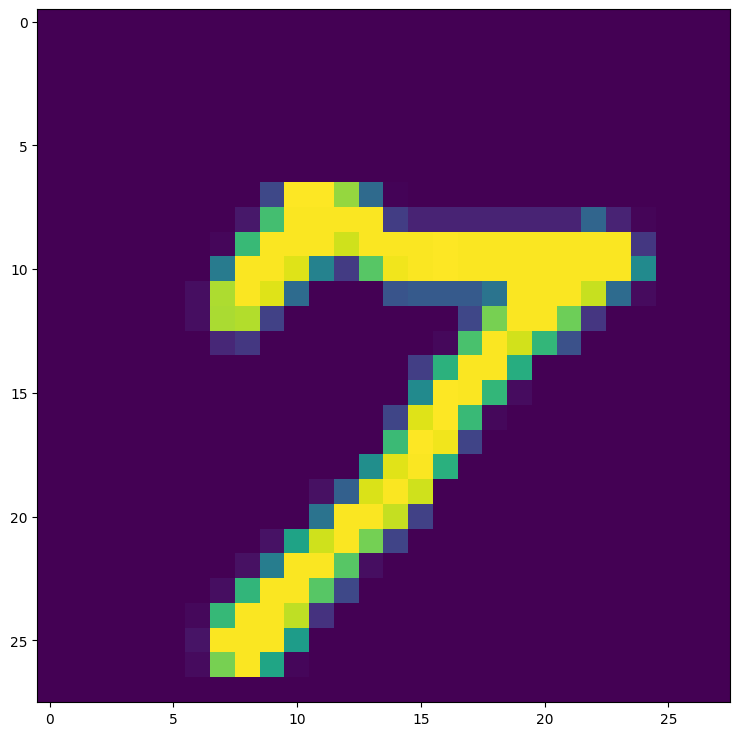

In [9]:
# Cross Checking images with labels

i= 69000 #index # of image
second_image = np.reshape(df.iloc[i, 0:784].values, (28, 28))

print("The above image is ",df.iloc[i,784])
plt.figure(figsize=(9,9))
plt.imshow(second_image)
plt.show()


In [10]:
#describe the dataframe
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,labels
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


### Data Preprocessing

##### To check null values in data

In [11]:
#To check null values in data
res= ["No Null Values found in data" if (df.isnull().values.any()) == False else "Null Values found in data"]
print(res[0])

No Null Values found in data


##### checking the digit wise label counts 

In [12]:
#checking the labels counts digit wise
values_count ={}
values_count = df['labels'].value_counts().rename_axis('Digit').reset_index(name='Counts')
print (values_count)

   Digit  Counts
0      1    7877
1      7    7293
2      3    7141
3      2    6990
4      9    6958
5      0    6903
6      6    6876
7      8    6825
8      4    6824
9      5    6313


#### Eliminating the columns with only zero values

In [13]:
# Check if all values are zero in column
new_cols=[]
for i in range(784):
    res="pixel"+str(i)
    if (df[res] == 0).all():
#         print("All values in the column {} are Zero".format(res))
        pass
    else:
        # print("All values in the column {} are not Zero".format(res))
        new_cols.append(res)

new_cols.append('labels')
new_df= df[new_cols]

In [14]:
#new dataframe with non zero columns
print("{} columns are founds that don't contains all zeros".format(new_df.shape[1]-1))

719 columns are founds that don't contains all zeros


In [15]:
#data backup for running algorithm over all digit
X=new_df.loc[:, new_df.columns != 'labels'].values
y = new_df['labels'].values


new_X = X.copy()
new_y = y.copy()

In [16]:
#digit wise count
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

[0 1 2 3 4 5 6 7 8 9] [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


##### Applying the condition and converting labels to 1 and -1 for digit 3

In [17]:
# Applying the condition and converting labels to 1 and -1 for digit 3
y = np.where(y == 3, 1, -1)



unique, counts = np.unique(y, return_counts=True)
print("\nlabels {0} counts digit wise after transformation is {1}\n".format(unique, counts))


labels [-1  1] counts digit wise after transformation is [62859  7141]



##### Spliting data into X and Y variable for training

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
X_test.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 719), (35000,), (35000, 719), (35000,))

#####  Fit training data into model

In [20]:
model_train = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()

##### R-squared : goodness of fit of a regression model

In [21]:
#calculate R-squared of regression model
print("R-squared for training data: ",model_train.rsquared)

R-squared for training data:  0.5339294776650398


##### Fitted Value

In [22]:
y_test_pred =model_train.predict(sm.add_constant(X_test.astype(float)))
y_train_pred =model_train.predict( sm.add_constant(X_train.astype(float)))


print("Prediction for training data\n: ",y_train_pred , end='\n\n')
print("Prediction for testing data\n: ",y_test_pred)

Prediction for training data
:  [-0.98001131 -1.33288749 -0.82549203 ... -0.87292405 -0.96489197
 -0.35973667]

Prediction for testing data
:  [-0.64519328 -0.6879639  -1.25562126 ... -0.9184351  -1.01022936
 -1.05078474]


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_test_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print("Mean Square Error : ",mse , end='\n\n')
print("Root Mean Square Error : ",rmse)

Mean Square Error :  0.18938502004013444

Root Mean Square Error :  0.4351838922112518


##### Predicted values

In [24]:
#The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs
predicted_class_test = np.sign(y_test_pred)
predicted_class_train = np.sign(y_train_pred)
print("Predicted Value for training data: ",predicted_class_train, end='\n\n')
print("Predicted Value for testing data: ",predicted_class_test)

Predicted Value for training data:  [-1. -1. -1. ... -1. -1. -1.]

Predicted Value for testing data:  [-1. -1. -1. ... -1. -1. -1.]


In [25]:
#function for transforming 
def transform_function(array):
    return (array > 0).astype(int)

In [26]:
train_score = accuracy_score(transform_function(y_train), transform_function(predicted_class_train))
test_score = accuracy_score(transform_function(y_test), transform_function(predicted_class_test))
print("Accuracy score for training data: ",train_score*100, end='\n\n')
print("Accuracy score for testing data: ",test_score*100)

Accuracy score for training data:  95.83714285714285

Accuracy score for testing data:  95.66857142857143


##### Plotting Beta Coefficient 

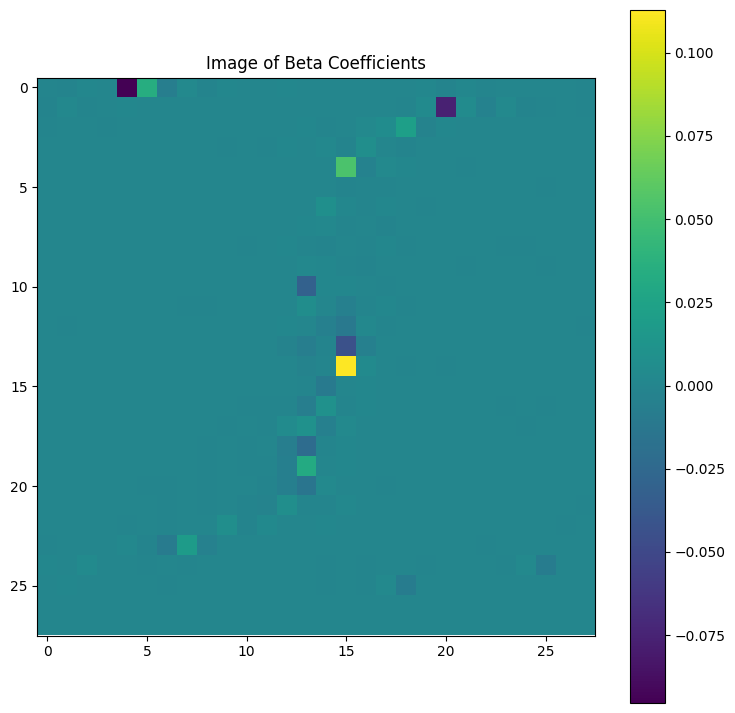

In [27]:
zeroes= np.zeros(65)
partial_beta= model_train.params
beta= np.append(partial_beta,zeroes)
betas = beta[1:]
B = np.reshape(betas, (28, 28))
B.shape
plt.figure(figsize=(9,9))
plt.title("Image of Beta Coefficients")
plt.imshow(B)
plt.colorbar()
plt.show()

##### Plotting random images with prediction 

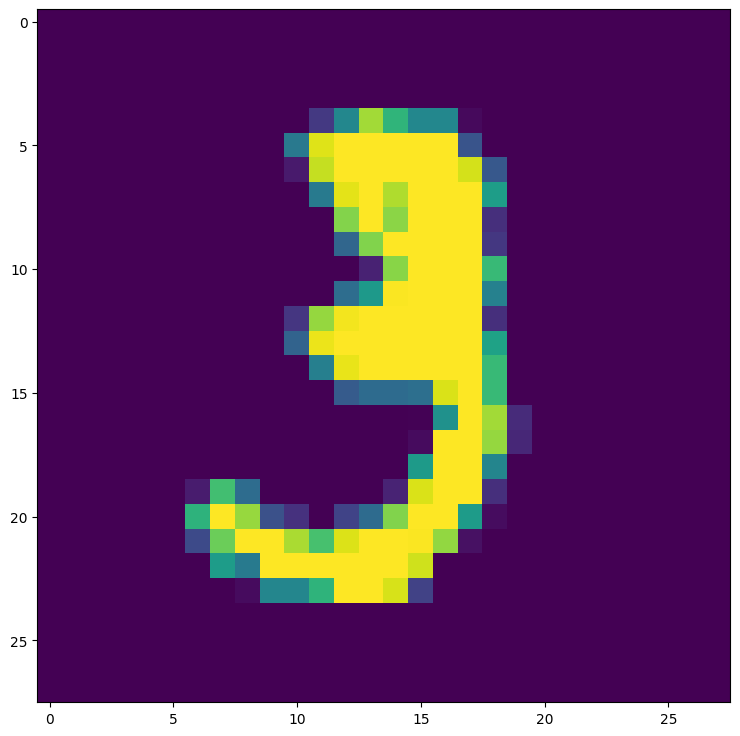

In [28]:
one_image = np.reshape(image_train[10,0:784], (28, 28))
plt.figure(figsize=(9,9))
plt.imshow(one_image)
plt.show()

In [29]:
print("Prediction for above image is: ", predicted_class_train[10])

Prediction for above image is:  1.0


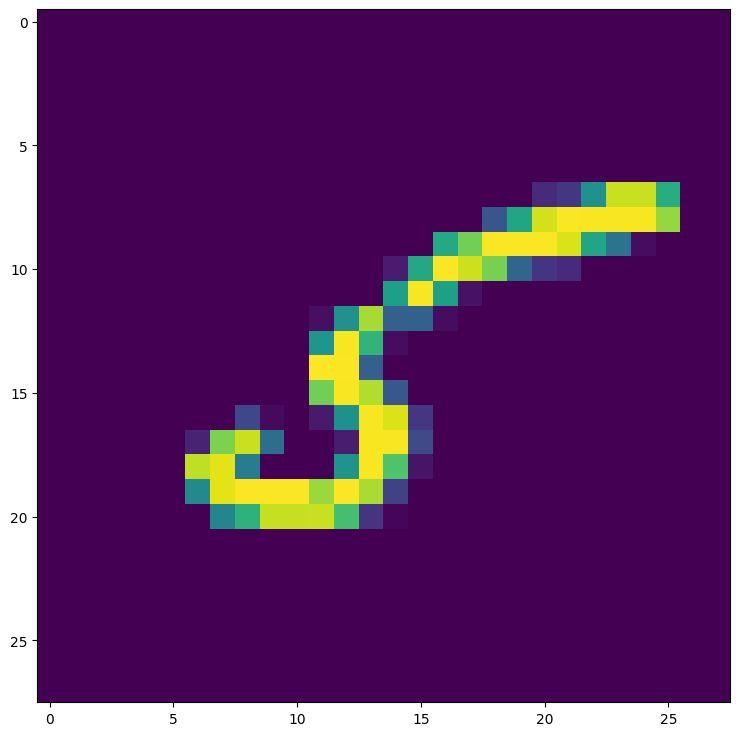

In [30]:
second_image = np.reshape(image_train[11,0:784], (28, 28))
# print(i)
plt.figure(figsize=(9,9))
plt.imshow(second_image)
plt.show()

In [31]:
print("Prediction for above image is: ", predicted_class_train[11])

Prediction for above image is:  -1.0


##### Confusion matrices for the both the training and test sets

In [32]:
cm_test = metrics.confusion_matrix(transform_function(y_test), transform_function(predicted_class_test))
print("Confusion Matrix\n",cm_test)

Confusion Matrix
 [[31274   175]
 [ 1341  2210]]


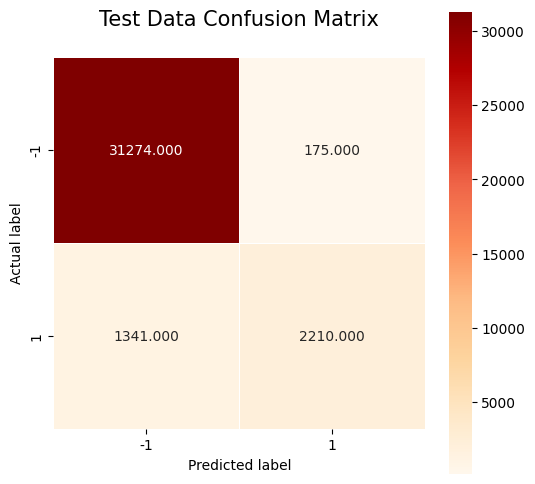

In [33]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data Confusion Matrix\n'
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);

In [34]:
cm_train = metrics.confusion_matrix(transform_function(y_train), transform_function(predicted_class_train))
cm_train

array([[31253,   157],
       [ 1300,  2290]], dtype=int64)

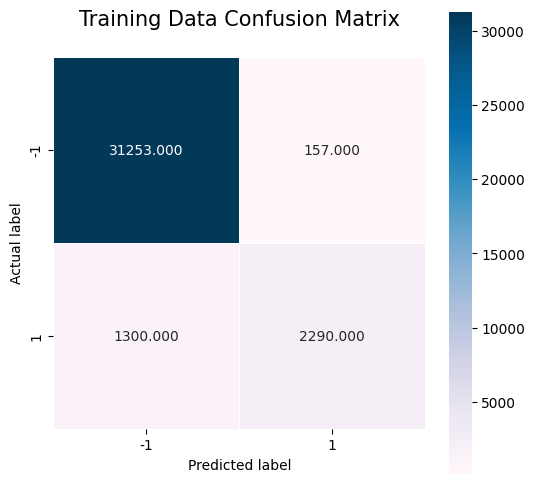

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data Confusion Matrix\n'.format(train_score)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);
# plt.savefig('digit_traincm.png')

#### Testing and Training Classification Error Rate

In [36]:
train_classification_error = 1 - train_score
test_classification_error = 1 - test_score

print("Training Classification Error Rate: ",np.round(train_classification_error*100, decimals=2), end='\n\n')
print("Testing Classification Error Rate: ",np.round(test_classification_error*100, decimals=2))


Training Classification Error Rate:  4.16

Testing Classification Error Rate:  4.33


### Diagnostic tests for Regression

In [37]:
# This is for diagnostic plots for digit 3

# model residuals
model_residuals = model_train.resid

ss = StandardScaler()
model_norm_residuals = ss.fit_transform(model_residuals.reshape(-1,1))

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
 
# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_train.get_influence().hat_matrix_diag

#### Residuals vs. Fitted

Text(0, 0.5, 'Residuals')

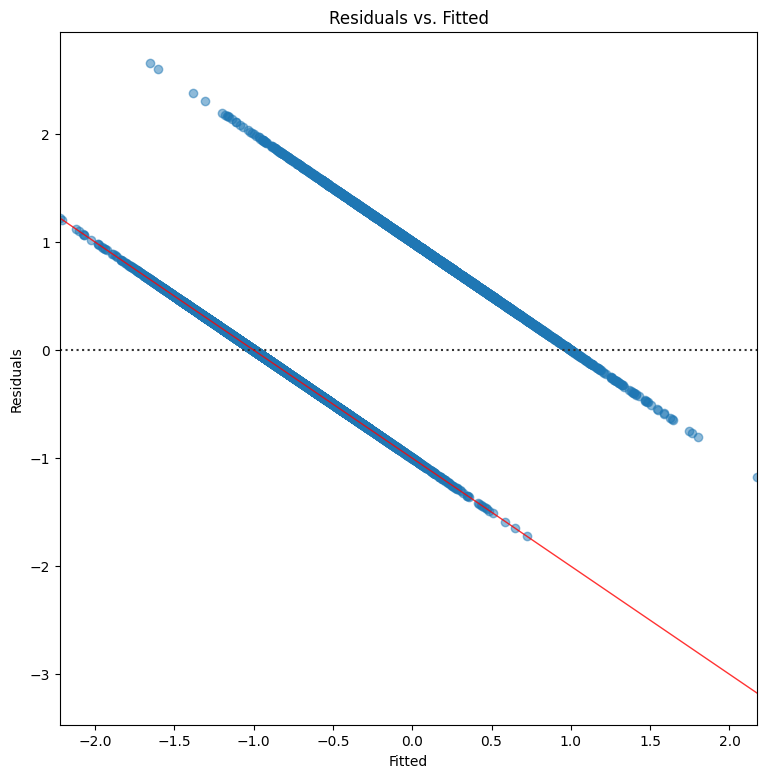

In [38]:
plt.figure(figsize=(9,9))
sns.residplot(x=y_train_pred.astype(float), y=y_train.astype(float),lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},);
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')


#### Normal Q-Q

In [ ]:
# from seaborn_qqplot import pplot



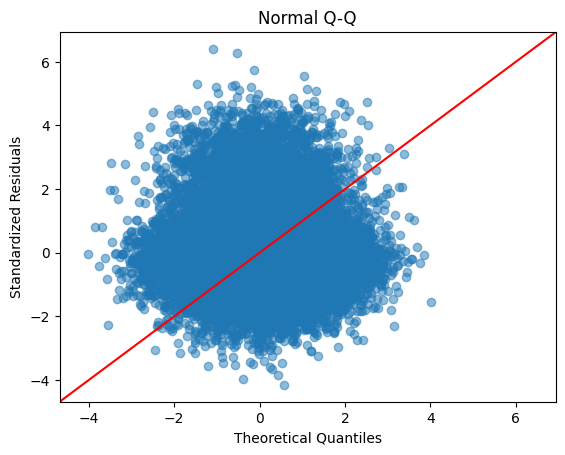

In [39]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

#### Scale-Location 

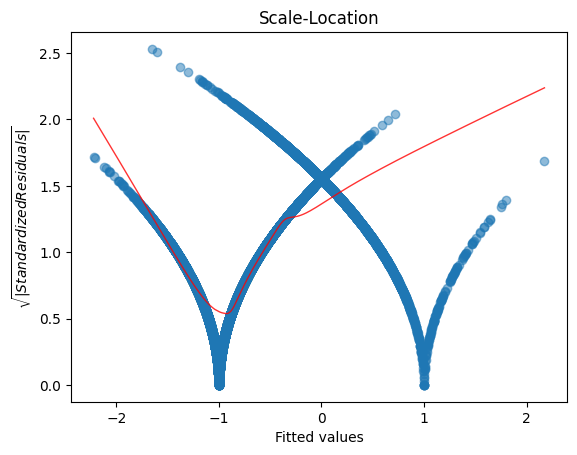

In [40]:
plot_lm_3 = plt.figure()
plt.scatter(y_train_pred, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x=y_train_pred, y=model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

#### Residuals vs Leverage

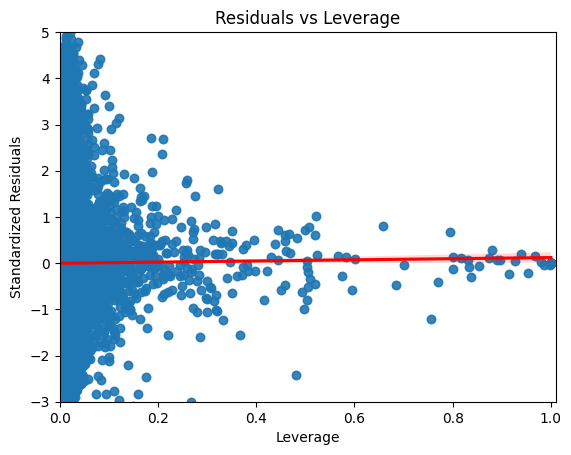

In [41]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(x=model_leverage, y=model_norm_residuals, line_kws={'color': 'red'})
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

### Backwards Selection Method

In [42]:
max_pvalue = 1
count = 1
while max_pvalue > 0.5:
    print("Step " + str(count))
    model = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()
    pvalues = model.pvalues[1:]
    max_pvalue = np.nanmax(pvalues)

    idx = np.where(model.pvalues == max_pvalue)[0][0] - 1
    X_train = np.delete(X_train, idx, axis = 1)
    
    
    
    count+=1

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 111
Step 112
Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 121
Step 122
Step 123
S

####  Training model after performing Backwards Selection Method 

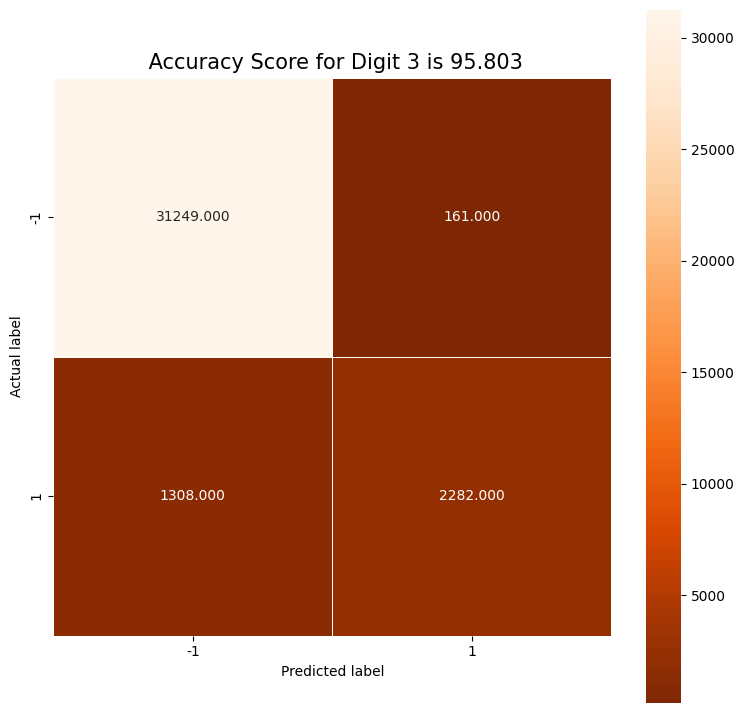

In [43]:
model_train = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()

y_train_pred =model_train.predict( sm.add_constant(X_train.astype(float)))


predicted_class_train = np.sign(y_train_pred)
train_score = accuracy_score(transform_function(y_train), transform_function(predicted_class_train))


cm = metrics.confusion_matrix(transform_function(y_train), transform_function(predicted_class_train))

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = " Accuracy Score for Digit 3 is " + str(round(train_score*100, 3)) 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);

#### Plotting Beta Coefficient after performing Backwards Selection Method

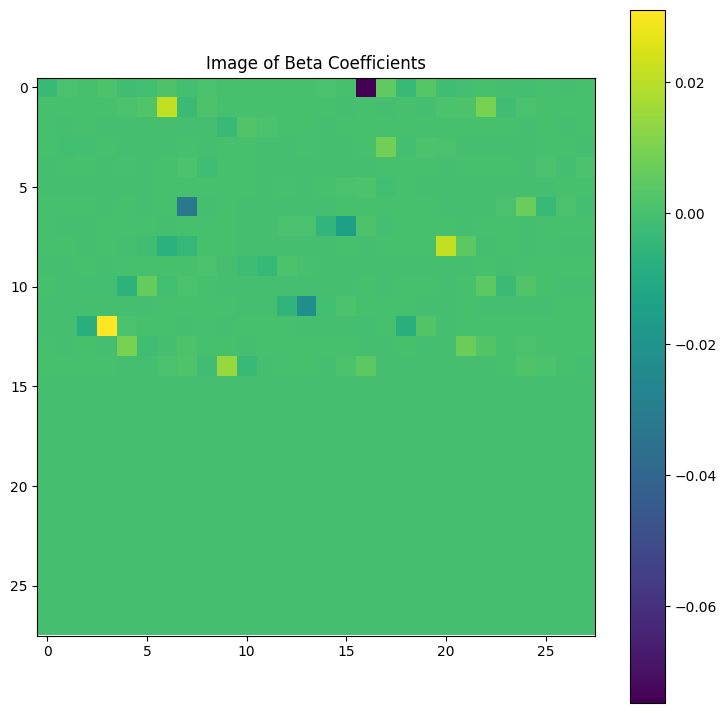

In [44]:
size_new_features = X_train.shape[1]
zeroes= np.zeros(784-size_new_features)
partial_beta= model_train.params
beta= np.append(partial_beta,zeroes)
betas = beta[1:]
# # betas_2 = model_train.params[1:]
B2 = np.reshape(betas, (28, 28))
B2.shape
plt.figure(figsize=(9,9))
plt.title("Image of Beta Coefficients")
plt.imshow(B2)
plt.colorbar()
plt.show()

#### Observation-  
- By performing backward selection method we reduced the features from 784 to around 420 which increases performance of algorithm and it takes less time to compute and train the model.

-  we got a accuracy of 95.83% and testing accuracy 95.66%

- Training Classification Error Rate:  4.16

- Testing Classification Error Rate:  4.33

- From the graph Residual vs Leaverage we can observe that there are some outlier points which are deviating from the mean of the data

# PART 2

In [45]:
# Function for ploting beta coefficient
def beta_coefficient(rate, model, k, ):
    if error_rate == rate:
        size_new_features = test_set[k][0].shape[1]
        zeroes= np.zeros(784-size_new_features)
        partial_beta= model.params
        beta= np.append(partial_beta,zeroes)
        betas = beta[1:]
        B2 = np.reshape(betas, (28, 28))
        B2.shape
        plt.figure(figsize=(9,9))
        plt.title("Image of Beta Coefficients {0} {1} Error Rate".format(rate,k))
        plt.imshow(B2)
        plt.colorbar()
        plt.show()

#### Storing the training and testing classification error rate into Upper and Lower traingular matrix

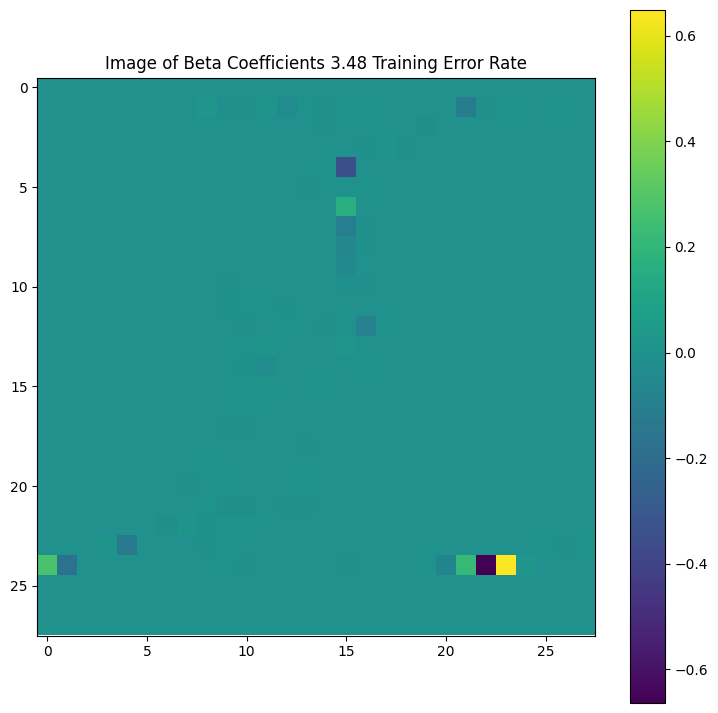

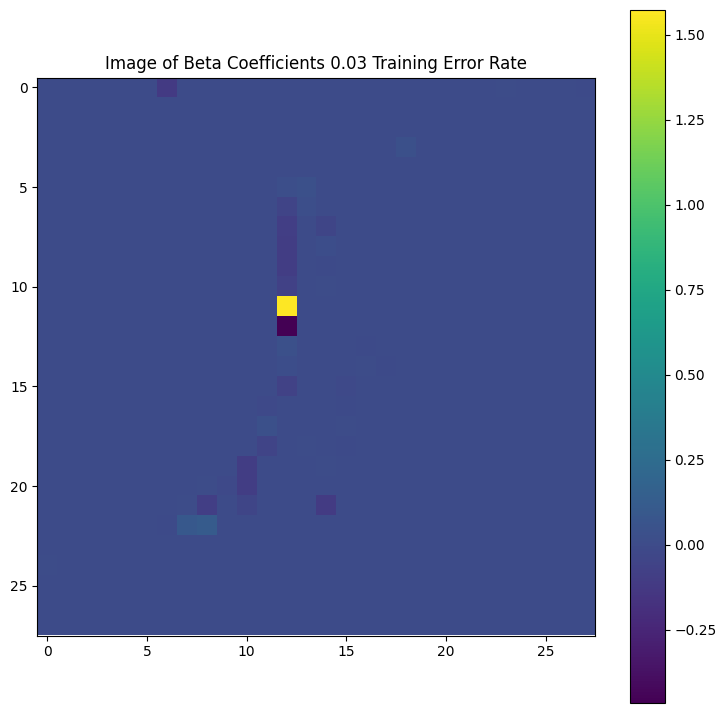

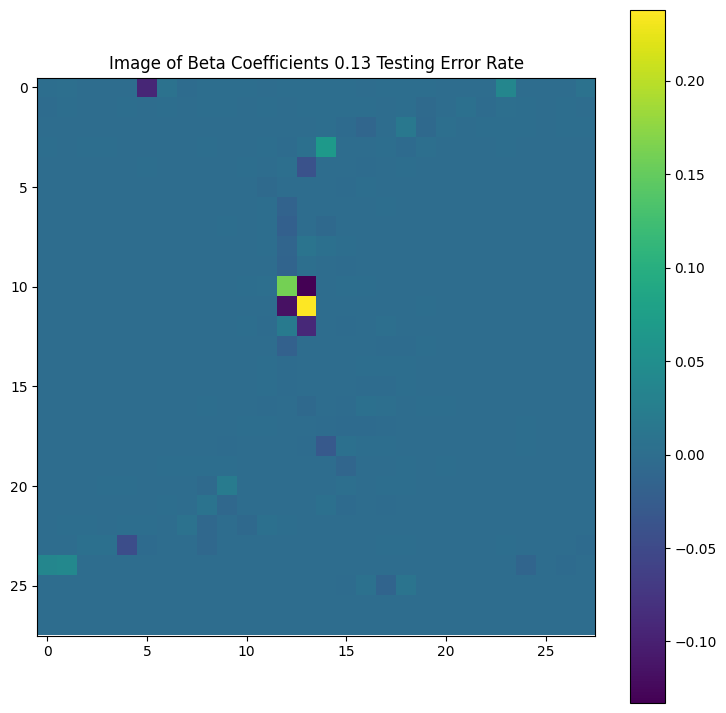

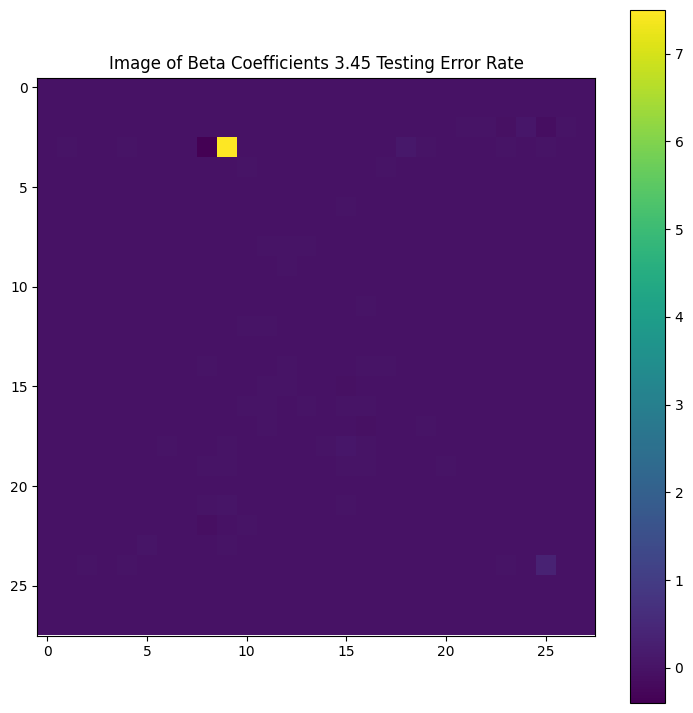

In [46]:
# 10x10 matrix for storing the training and testing classification error rate

train_errors = [[0] * 10 for _ in range(10)]
test_errors = [[0] * 10 for _ in range(10)]
train_max=[]
test_max=[]

for i in range(10):
    for j in range(i+1,10):
        test_set={}
        df1 =new_df.loc[(new_df['labels'].isin([i,j]))]
        X=df1.loc[:, df1.columns != 'labels'].values
        y = df1['labels'].values
        y = np.where(y == int(i), 1, -1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

        test_set['Training'] = [X_train,y_train]
        test_set['Testing'] = [X_test,y_test]

        for k in test_set.keys():
            model_test = sm.OLS(test_set[k][1].astype(float), sm.add_constant(test_set[k][0].astype(float))).fit()
            predicted_class_test = np.sign(model_test.fittedvalues)
            test_score = accuracy_score(transform_function(test_set[k][1]), transform_function(predicted_class_test))
            cm_test = metrics.confusion_matrix(transform_function(test_set[k][1]), transform_function(predicted_class_test))

            all_sample_title = "Accuracy Score for " + str(k) +" on digit "+ str(i) +" and "+ str(j) +  " is " + str(round(test_score*100, 3)) 
#             print(all_sample_title)

            classification_error = 1 - test_score
#             print( str(k)+" Classification Error Rate: ",np.round(classification_error*100, decimals=2),end='\n\n')
            
            if k == 'Training':
            
                error_rate= np.round(classification_error*100, decimals=2)
                train_errors[i][j]= error_rate
                beta_coefficient(3.48 ,model_test,k)
                beta_coefficient(0.030 ,model_test,k)
                
                
            else:
                error_rate =np.round(classification_error*100, decimals=2)
                test_errors[i][j]= error_rate
                beta_coefficient(3.450 ,model_test,k)
                beta_coefficient(0.130 ,model_test,k)


####  Upper and Lower Triangular Matrix for Error Rate

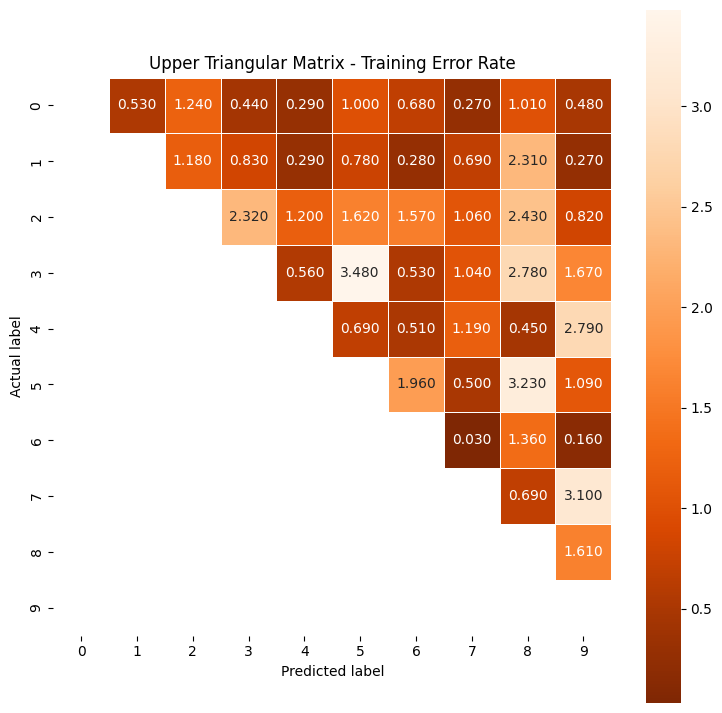

In [47]:
cm_train_df = pd.DataFrame(train_errors)
cm_train_df.replace(0, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_train_df , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax, mask= cm_train_df.isnull());
plt.title("Upper Triangular Matrix - Training Error Rate")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Text(0.5, 1.0, 'Lower Triangular Matrix - Testing Error Rate')

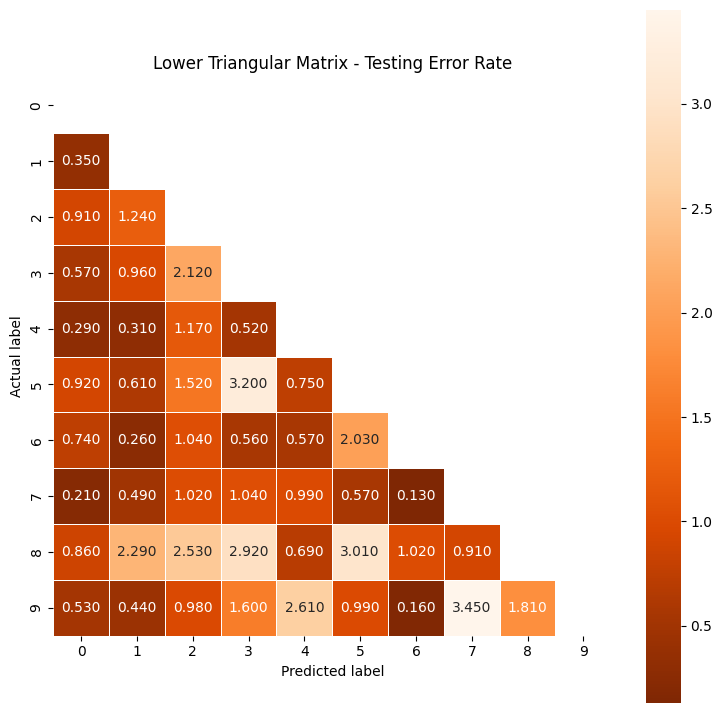

In [48]:
cm_test_df = pd.DataFrame(np.array(test_errors).T)
cm_test_df.replace(0, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_test_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Lower Triangular Matrix - Testing Error Rate")

# PART- 3 Logistic Regression 


#### Model for K vs Not-K  Part-1

In [49]:
#Splitting data into train and test set

y= new_y.copy()
y = np.where(y == 3, 1, -1)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.5)





# # Logistic Regression model Object
log_reg = LogisticRegression(max_iter=5000)

# Divide pixel values by 255 for data normalization
X_train = X_train / 255
X_test = X_test / 255

# # Fit model to training data
log_reg.fit(X_train, y_train)

#Prediction using test data
predictions = log_reg.predict(X_test)

#confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

#Calculating accuracy score of the model 
score = accuracy_score(y_test, predictions)
print("Model Accuracy Score: " + str(score*100) + "%")

Model Accuracy Score: 97.53142857142856%


##### Plotting Beta Coefficient of Logistic Regression

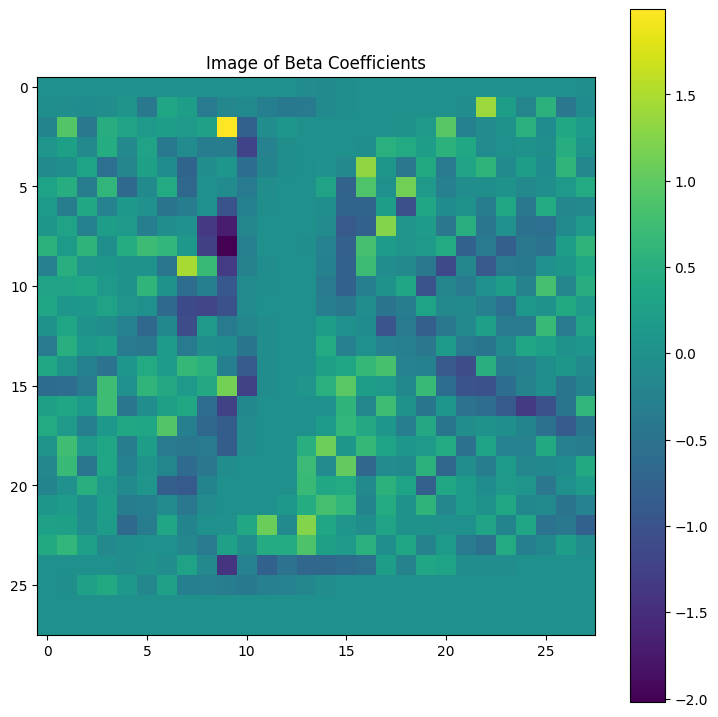

In [50]:
zeroes= np.zeros(785-log_reg.coef_.shape[1])
partial_beta= log_reg.coef_
beta= np.append(partial_beta,zeroes)
betas = beta[1:]
B = np.reshape(betas, (28, 28))
B.shape
plt.figure(figsize=(9,9))
plt.title("Image of Beta Coefficients")
plt.imshow(B)
plt.colorbar()
plt.show()

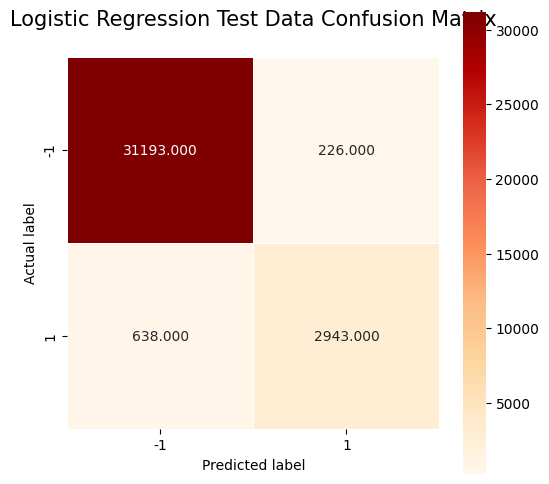

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Test Data Confusion Matrix\n'
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);

### Comparing the Results

#### As we can see that Logistic regression is performing better than Linear Regression  from the False Negative rate ie 592 in logistic and 1341 in linear regression 


- We got higher accuracy 97.54% with logistic regression as comapred to linear regression ie 95.80%

- Confusion Matrix- Linear Regression [[31274 175][ 1341  2210]]


- Confusion Matrix- Logistic Regression[[31179,   306] [  592,  2923]],

#### Model for All Pairs of Digits Part-2


In [52]:
# 10x10 matrix for storing the training and testing classification error rate

train_errors = [[1] * 10 for _ in range(10)]
test_errors = [[1] * 10 for _ in range(10)]
train_max=[]
test_max=[]

for i in range(10):
    for j in range(i+1,10):
        test_set={}
        df1 =new_df.loc[(new_df['labels'].isin([i,j]))]
        X=df1.loc[:, df1.columns != 'labels'].values
        y = df1['labels'].values
        y = np.where(y == int(i), 1, -1)
        

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
        test_set['Training'] = [X_train,y_train]
        test_set['Testing'] = [X_test,y_test]
        log_reg = LogisticRegression()
        for k in test_set.keys():
             #model_test = sm.OLS(test_set[k][1].astype(float), sm.add_constant(test_set[k][0].astype(float))).fit()
            log_reg.fit(test_set[k][0], test_set[k][1])
            
        
           #Prediction using test data
            predictions = log_reg.predict(test_set[k][0])

            #confusion matrix
            cm_test = metrics.confusion_matrix(test_set[k][1], predictions)

            #Calculating accuracy score of the model 
            test_score = accuracy_score(test_set[k][1], predictions)
       

            all_sample_title = "Accuracy Score for " + str(k) +" on digit "+ str(i) +" and "+ str(j) +  " is " + str(round(test_score*100, 3)) 
#             print(all_sample_title)

            classification_error = 1 - test_score
#             print( str(k)+" Classification Error Rate: ",np.round(classification_error*100, decimals=2),end='\n\n')
            
            if k == 'Training':
            
                error_rate= np.round(classification_error*100, decimals=2)
                train_errors[i][j]= error_rate               
                
            else:
                error_rate =np.round(classification_error*100, decimals=2)
                test_errors[i][j]= error_rate


####  Upper Triangular Matrix for Training Error Rate of Logistic Regression

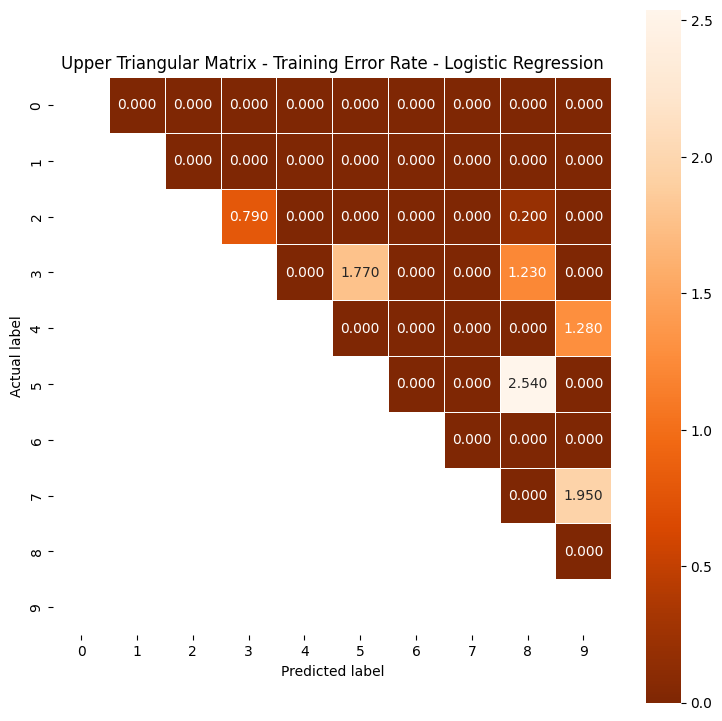

In [53]:
cm_train_df = pd.DataFrame(train_errors)
cm_train_df.replace(1, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_train_df , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax, mask= cm_train_df.isnull());
plt.title("Upper Triangular Matrix - Training Error Rate - Logistic Regression")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### Lower Triangular Matrix for Testing Error Rate - Logistic Regression

Text(0.5, 1.0, 'Lower Triangular Matrix - Testing Error Rate - Logistic Regression')

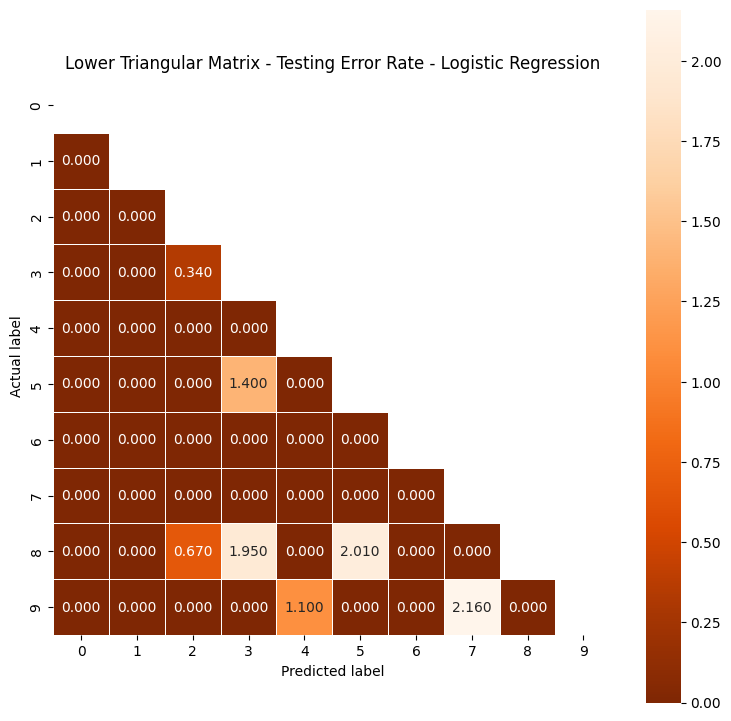

In [54]:
cm_test_df = pd.DataFrame(np.array(test_errors).T)
cm_test_df.replace(1, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_test_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax,);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Lower Triangular Matrix - Testing Error Rate - Logistic Regression")

# PART -4 

#### Calculating Cook's Distance for K vs Not K for digit 3  - PART-1

In [55]:
import numpy as np
np.set_printoptions(suppress=True)



X= new_df.loc[:, new_df.columns != 'labels'].values
y = new_df['labels'].values
y = np.where(y == 3, 1, -1)

model= sm.OLS(y.astype(float), sm.add_constant(X.astype(float))).fit()


##create instance of influence
influence = model.get_influence()

##obtain Cook's distance for each observation
cooks = influence.cooks_distance

##display Cook's distances
#print(cooks)    
data= pd.DataFrame(X)
data['labels'] = y
data['CooksDistance']= cooks[0]


non_outliers= data[data['CooksDistance']<4/len(data)]
non_outliers_X= non_outliers.loc[:, ~non_outliers.columns.isin(['CooksDistance', 'labels'])].values
non_outliers_y = non_outliers['labels'].values



#### Outliers using Cook's Distance

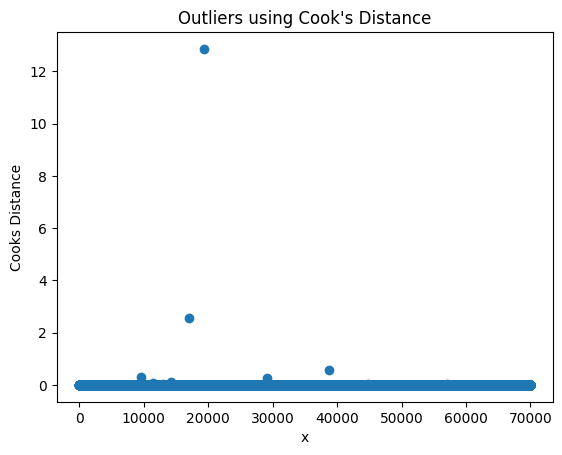

In [56]:
plt.scatter(pd.DataFrame(X).index,cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.title("Outliers using Cook's Distance")
plt.show()

#### Splitting Non-Outlier data into train and test 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(non_outliers_X, non_outliers_y, test_size=0.5, random_state=42)

#Non Outlier Model training
model_train = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()

#Prediction
y_test_pred =model_train.predict(sm.add_constant(X_test.astype(float)))
y_train_pred =model_train.predict( sm.add_constant(X_train.astype(float)))


print("Prediction for training data\n: ",y_train_pred , end='\n\n')
print("Prediction for testing data\n: ",y_test_pred)

Prediction for training data
:  [-0.76472023 -0.7316442  -0.99559283 ... -1.1052228  -1.13779619
 -0.89797956]

Prediction for testing data
:  [-0.80944578 -0.77854065 -1.1976249  ... -0.69295789 -0.65433739
 -1.45436585]


In [58]:
#The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs
predicted_class_test = np.sign(y_test_pred)
predicted_class_train = np.sign(y_train_pred)
print("Predicted Value for training data: ",predicted_class_train, end='\n\n')
print("Predicted Value for testing data: ",predicted_class_test)

Predicted Value for training data:  [-1. -1. -1. ... -1. -1. -1.]

Predicted Value for testing data:  [-1. -1. -1. ... -1. -1. -1.]


In [59]:
train_score = accuracy_score(transform_function(y_train), transform_function(predicted_class_train))
test_score = accuracy_score(transform_function(y_test), transform_function(predicted_class_test))
print("Accuracy score for training data: ",train_score*100, end='\n\n')
print("Accuracy score for testing data: ",test_score*100)

Accuracy score for training data:  98.40790308449895

Accuracy score for testing data:  98.36258723301411


#### Image of Beta Coefficients

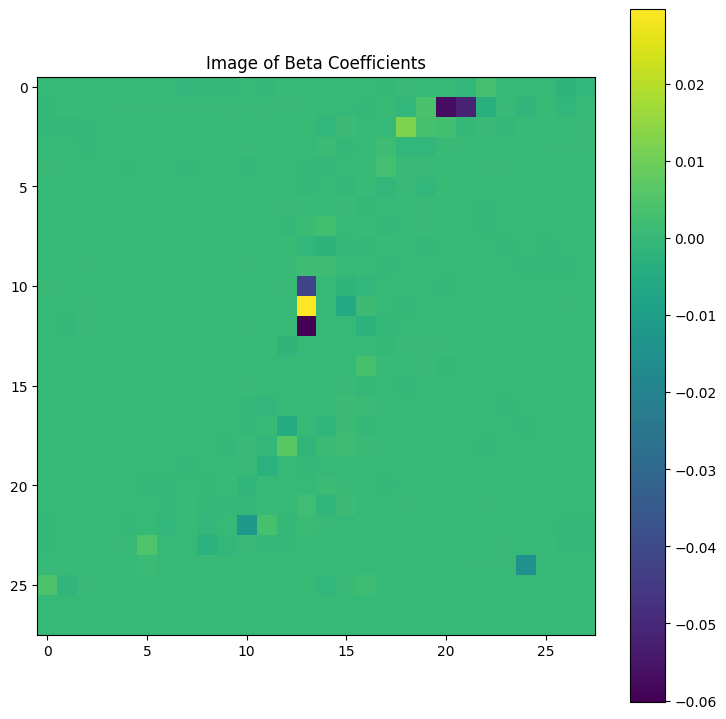

In [60]:
zeroes= np.zeros(65)
partial_beta= model_train.params
beta= np.append(partial_beta,zeroes)
betas = beta[1:]
B = np.reshape(betas, (28, 28))
B.shape
plt.figure(figsize=(9,9))
plt.title("Image of Beta Coefficients")
plt.imshow(B)
plt.colorbar()
plt.show()

#### Confusion Matrix for training and testing

In [61]:
cm_test = metrics.confusion_matrix(transform_function(y_test), transform_function(predicted_class_test))
print("Confusion Matrix\n",cm_test)

Confusion Matrix
 [[30759    13]
 [  529  1800]]


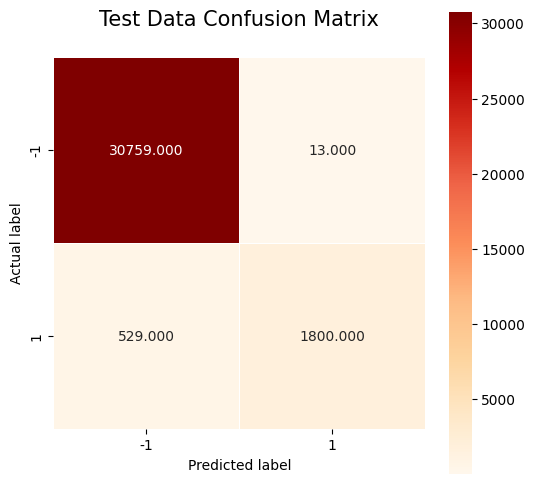

In [62]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data Confusion Matrix\n'
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);

In [63]:
cm_train = metrics.confusion_matrix(transform_function(y_train), transform_function(predicted_class_train))
cm_train

array([[30783,     8],
       [  519,  1791]], dtype=int64)

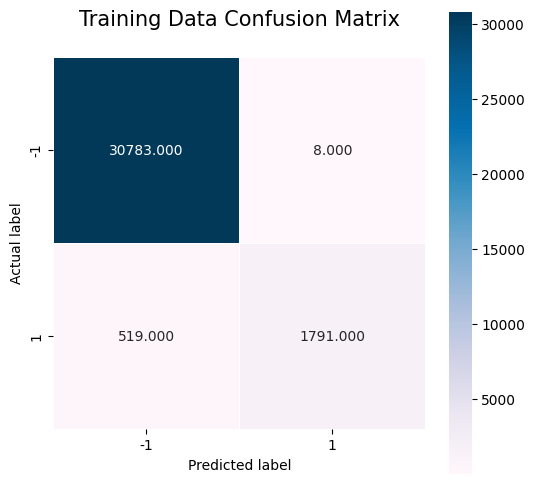

In [64]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data Confusion Matrix\n'.format(train_score)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);

#### Training and Testing Classification Error Rate

In [65]:
train_classification_error = 1 - train_score
test_classification_error = 1 - test_score

print("Training Classification Error Rate: ",np.round(train_classification_error*100, decimals=2), end='\n\n')
print("Testing Classification Error Rate: ",np.round(test_classification_error*100, decimals=2))

Training Classification Error Rate:  1.59

Testing Classification Error Rate:  1.64


### Calculating Cook's Distance for all pairs of digit  - PART-2

In [66]:
# 10x10 matrix for storing the training and testing classification error rate

train_errors = [[1] * 10 for _ in range(10)]
test_errors = [[1] * 10 for _ in range(10)]
train_max=[]
test_max=[]


for i in range(10):
    for j in range(i+1,10):
        test_set={}
        df1 =new_df.loc[(new_df['labels'].isin([i,j]))]
        X=df1.loc[:, df1.columns != 'labels'].values
        y = df1['labels'].values
        y = np.where(y == int(i), 1, -1)
        
        model= sm.OLS(y.astype(float), sm.add_constant(X.astype(float))).fit()

        ##create instance of influence
        influence = model.get_influence()

        ##obtain Cook's distance for each observation
        cooks = influence.cooks_distance

        ##display Cook's distances
        #print(cooks)    
        data= pd.DataFrame(X)
        data['labels'] = y
        data['CooksDistance']= cooks[0]

        non_outliers= data[data['CooksDistance']<4/len(data)]
        non_outliers_X= non_outliers.loc[:, ~non_outliers.columns.isin(['CooksDistance', 'labels'])].values
        non_outliers_y = non_outliers['labels'].values  
        
        X_train, X_test, y_train, y_test = train_test_split(non_outliers_X, non_outliers_y, test_size=0.5, random_state=42)
        
        test_set['Training'] = [X_train,y_train]
        test_set['Testing'] = [X_test,y_test]
        
        
        

        for k in test_set.keys():
            model_test = sm.OLS(test_set[k][1].astype(float), sm.add_constant(test_set[k][0].astype(float))).fit()
            predicted_class_test = np.sign(model_test.fittedvalues)
            test_score = accuracy_score(transform_function(test_set[k][1]), transform_function(predicted_class_test))
            
            cm_test = metrics.confusion_matrix(transform_function(test_set[k][1]), transform_function(predicted_class_test))
            classification_error = 1 - test_score
    
            if k == 'Training':
            
                error_rate= np.round(classification_error*100, decimals=2)
                train_errors[i][j]= error_rate
                
#                 beta_coefficient(6.840 ,model_test,k)
#                 beta_coefficient(0.140 ,model_test,k)
                
                
            else:
                error_rate =np.round(classification_error*100, decimals=2)
                test_errors[i][j]= error_rate
            

#### Upper Triangular Matrix for Training Error Rate on Non Outlier data

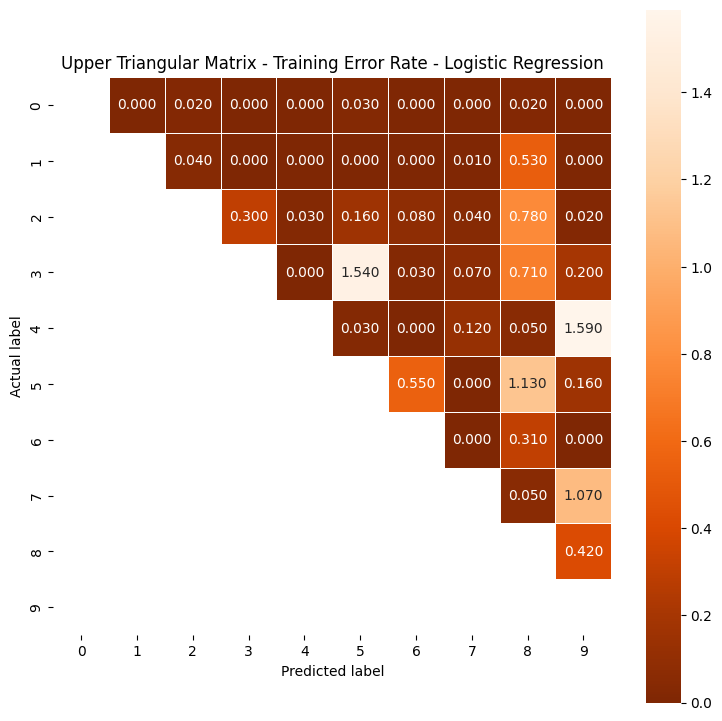

In [67]:
cm_train_df = pd.DataFrame(train_errors)
cm_train_df.replace(1, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_train_df , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax, mask= cm_train_df.isnull());
plt.title("Upper Triangular Matrix - Training Error Rate - Logistic Regression")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### Lower Triangular Matrix for Testing Error Rate on Non Outlier data

Text(0.5, 1.0, 'Lower Triangular Matrix - Testing Error Rate - Logistic Regression')

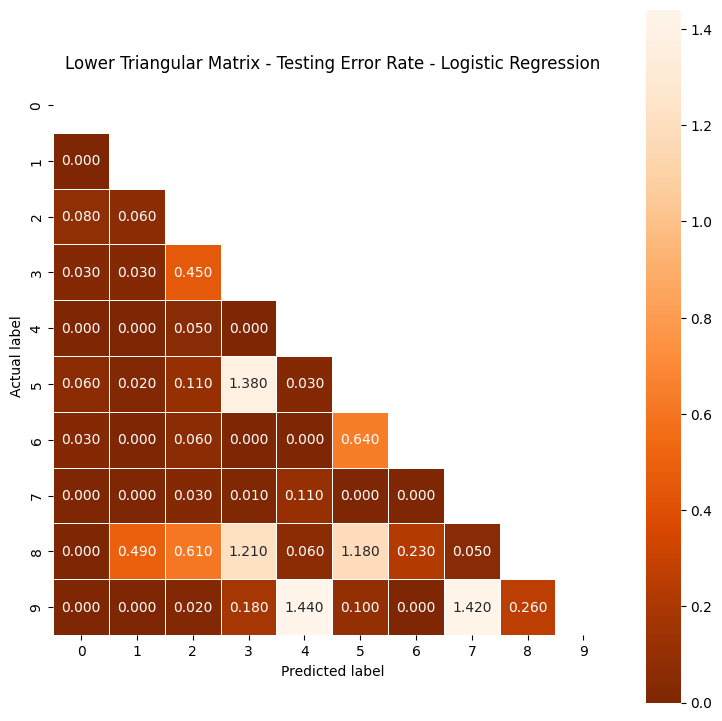

In [68]:
cm_test_df = pd.DataFrame(np.array(test_errors).T)
cm_test_df.replace(1, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_test_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax,);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Lower Triangular Matrix - Testing Error Rate - Logistic Regression")

### Calculating Cook's Distance for all pairs of digit using Logistic Regression PART-3

In [69]:
# 10x10 matrix for storing the training and testing classification error rate

train_errors = [[1] * 10 for _ in range(10)]
test_errors = [[1] * 10 for _ in range(10)]
train_max=[]
test_max=[]


for i in range(10):
    for j in range(i+1,10):
        test_set={}
        df1 =new_df.loc[(new_df['labels'].isin([i,j]))]
        X=df1.loc[:, df1.columns != 'labels'].values
        y = df1['labels'].values
        y = np.where(y == int(i), 1, -1)
        
        model= sm.OLS(y.astype(float), sm.add_constant(X.astype(float))).fit()

        ##create instance of influence
        influence = model.get_influence()

        ##obtain Cook's distance for each observation
        cooks = influence.cooks_distance

        ##display Cook's distances
        #print(cooks)    
        data= pd.DataFrame(X)
        data['labels'] = y
        data['CooksDistance']= cooks[0]

        non_outliers= data[data['CooksDistance']<4/len(data)]
        non_outliers_X= non_outliers.loc[:, ~non_outliers.columns.isin(['CooksDistance', 'labels'])].values
        non_outliers_y = non_outliers['labels'].values  
        
        X_train, X_test, y_train, y_test = train_test_split(non_outliers_X, non_outliers_y, test_size=0.5, random_state=42)
        
        test_set['Training'] = [X_train,y_train]
        test_set['Testing'] = [X_test,y_test]
        
        log_reg = LogisticRegression(max_iter=5000)
        for k in test_set.keys():
             #model_test = sm.OLS(test_set[k][1].astype(float), sm.add_constant(test_set[k][0].astype(float))).fit()
            log_reg.fit(test_set[k][0], test_set[k][1])
            
        
            #Prediction using test data
            predictions = log_reg.predict(test_set[k][0])


            #confusion matrix
            cm_test = metrics.confusion_matrix(test_set[k][1], predictions)

            #Calculating accuracy score of the model 
            test_score = accuracy_score(test_set[k][1], predictions)
            
       

            all_sample_title = "Accuracy Score for " + str(k) +" on digit "+ str(i) +" and "+ str(j) +  " is " + str(round(test_score*100, 3)) 
            print(all_sample_title)

            classification_error = 1 - test_score
            print( str(k)+" Classification Error Rate: ",np.round(classification_error*100, decimals=2),end='\n\n')
            
            if k == 'Training':
            
                error_rate= np.round(classification_error*100, decimals=2)
                train_errors[i][j]= error_rate

            else:
                error_rate =np.round(classification_error*100, decimals=2)
                test_errors[i][j]= error_rate


            

Accuracy Score for Training on digit 0 and 1 is 100.0
Training Classification Error Rate:  0.0

Accuracy Score for Testing on digit 0 and 1 is 100.0
Testing Classification Error Rate:  0.0

Accuracy Score for Training on digit 0 and 2 is 100.0
Training Classification Error Rate:  0.0

Accuracy Score for Testing on digit 0 and 2 is 100.0
Testing Classification Error Rate:  0.0

Accuracy Score for Training on digit 0 and 3 is 100.0
Training Classification Error Rate:  0.0

Accuracy Score for Testing on digit 0 and 3 is 100.0
Testing Classification Error Rate:  0.0

Accuracy Score for Training on digit 0 and 4 is 100.0
Training Classification Error Rate:  0.0

Accuracy Score for Testing on digit 0 and 4 is 100.0
Testing Classification Error Rate:  0.0

Accuracy Score for Training on digit 0 and 5 is 100.0
Training Classification Error Rate:  0.0

Accuracy Score for Testing on digit 0 and 5 is 100.0
Testing Classification Error Rate:  0.0

Accuracy Score for Training on digit 0 and 6 is 10

KeyboardInterrupt: 

#### Upper Triangular Matrix for Training Error Rate on Non Outlier data Using Logistic Regression - PART3

In [ ]:
cm_train_df = pd.DataFrame(train_errors)
cm_train_df.replace(1, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_train_df , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax, mask= cm_train_df.isnull());
plt.title("Upper Triangular Matrix - Training Error Rate - Logistic Regression")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### Lower Triangular Matrix for Testing Error Rate on Non Outlier data Using Logistic Regression - PART3

In [ ]:
cm_test_df = pd.DataFrame(np.array(test_errors).T)
cm_test_df.replace(1, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_test_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax,);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Lower Triangular Matrix - Testing Error Rate - Logistic Regression")

#### After removing the outliers I am getting 100% accuracy on each every pair of digits
